In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2025-11-30 / Aki Taanila


## Histplot - määrällisen muuttujan luokiteltu jakauma

Määrällisen muuttujan jakauman graafiseen esittämiseen voidaan käyttää

- Ruutu- ja janakaaviota (boxplot), joka perustuu tilastollisiin tunnuslukuihin. Katso https://github.com/taanila/kaaviot/blob/master/sns_box.ipynb.
- Histogrammia, joka esittää luokitellun muuttujan lukumäärä- tai prosenttiyhteenvedon.

Tässä muistiossa esitetään esimerkkejä histogrammin käytöstä.

### Tuonnit ja alkuvalmistelut

- Grafiikan tyylimäärittelyssä voit käyttää **'whitegrid'** sijasta **'white'**, **'dark'**, **'darkgrid'** tai **'ticks'**. Voit myös jättää tyylimäärittelyn tekemättä.
- **PercentFormatter** auttaa muotoilemaan akselin prosenttiasteikon.
- **MultipleLocator** auttaa muuttamaan akselin asteikon jaotusta.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from matplotlib.ticker import PercentFormatter, MultipleLocator
ticks = PercentFormatter(xmax=100, decimals=0, symbol=' %')

### Datan avaaminen

Seaborn-paketin esimerkkidata **tips** sisältää tietoja ravintolassa asioineista seurueista.

In [3]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Luokiteltu jakauma

Seabornin **histplot** esittää määrällisen muuttujan luokitellun jakauman histogrammina. Lisätietoa https://seaborn.pydata.org/generated/seaborn.histplot.html.

Seuraavassa esitetään laskun loppusumman jakauma käyttäen luokitelua kuuteen luokkaan (`bins=6`)

Text(0, 0.5, 'Lukumäärä')

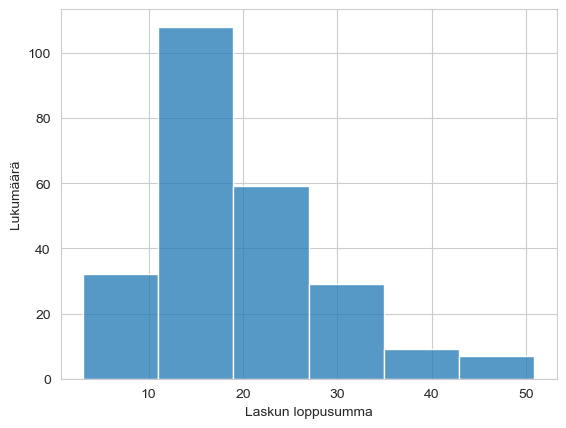

In [4]:
sns.histplot(tips, x='total_bill', bins=6)
plt.xlabel('Laskun loppusumma')
plt.ylabel('Lukumäärä')

**bins**-parametrilla voit määrittää luokkien lukumäärien sijasta myös täsmälliset luokkarajat listana. Luokkarajoja tulkitaan seuraavasti:
- Luokkien alarajat sisältyvät luokkaan, mutta ylärajat eivät.
- Poikkeuksena viimeisen luokan yläraja sisältyy luokkaan.

Text(0, 0.5, 'Lukumäärä')

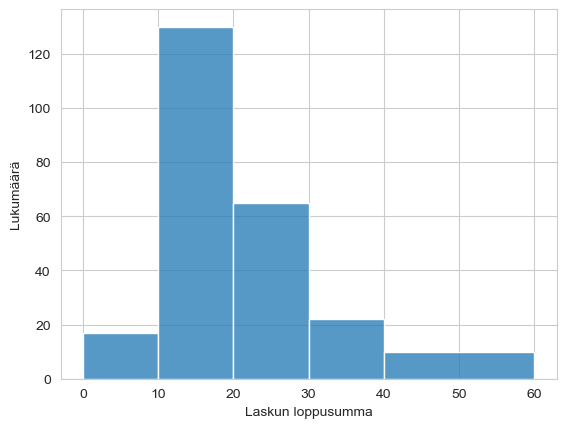

In [5]:
bins = [0, 10, 20, 30, 40, 60]
sns.histplot(tips, x='total_bill', bins=bins)
plt.xlabel('Laskun loppusumma')
plt.ylabel('Lukumäärä')

Seuraavassa esitetään lukumäärien sijasta prosentit (`stat='percent'`). Pystyakselin asteikko muotoillaan prosenttiasteikoksi käyttäen aiemmin määriteltyä **ticks**-muotoilua. Asteikon jaotus säädetään kymmenen välein.

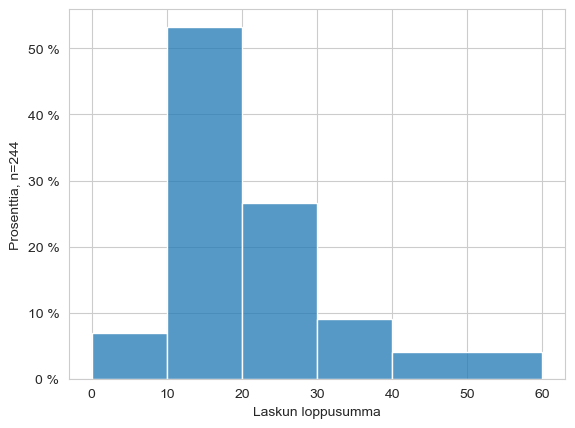

In [6]:
bins = [0, 10, 20, 30, 40, 60]
ax = sns.histplot(tips, x='total_bill', bins=bins, stat='percent')
plt.xlabel('Laskun loppusumma')
plt.ylabel(f'Prosenttia, n={tips['total_bill'].count()}')
ax.yaxis.set_major_formatter(ticks)
ax.yaxis.set_major_locator(MultipleLocator(10))

### Usean histogrammin yhdistelmä

Usean kaavion yhdistelmä voidaan luoda **plt.subplots**-funktiolla, joka palauttaa kuvion (**figure**) ja kuvion sisään sijoitettujen kaavioiden listan. Seuraavassa nämä on sijoitettu muuttujien **fig** ja **axs** arvoiksi. Parametrin `ncols=len(muuttujat)` mukaisesti luodaan kuvio, joka sisältää kaksi kaaviota vierekkäin. Kaavioilla on yhteinen y-akseli (`sharey=True`) ja kuvion koko on **12.8 x 4.8**. Oletuskuvion koko olisi ollut **6.4 x 4.8**.

Kuvion sisällä sijaitseviin kaavioihin voit viitata **axs[0]** ja **axs[1]**. Kaaviot luodaan normaaliin tapaan, mutta ylimääräisenä parametrina **ax** annetaan viittaus kaavion sijaintiin kuvion sisällä, esimerkiksi `ax=axs[0]`.

Usean kaavion yhdistelmissä kannattaa yksittäisen kaavion muotoiluun käyttää **plt**:n sijasta suoraa viittausta muotoiltavaan kaavioon (esimerkiksi `axs[0]`). Lisätietoa https://matplotlib.org/stable/api/axes_api.html.

Lisätietoa usean kaavion yhdistelmistä https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html.

Text(0.5, 0, 'Juomaraha dollareina')

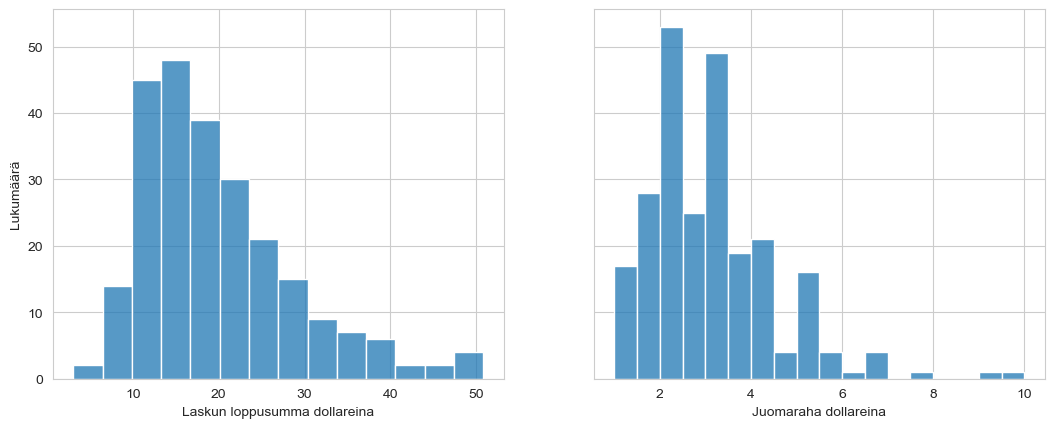

In [7]:
muuttujat = ['total_bill', 'tip']
fig, axs = plt.subplots(nrows=1, ncols=len(muuttujat), sharey=True, figsize=(12.8, 4.8))

# Käydään muuttujat-lista läpi: i=järjestysnumero, muuttuja=muuttujan nimi
for i, muuttuja in enumerate(muuttujat):
    sns.histplot(tips, x=muuttuja, ax=axs[i])
    
axs[0].set_xlabel('Laskun loppusumma dollareina')
axs[0].set_ylabel('Lukumäärä')
axs[1].set_xlabel('Juomaraha dollareina')

### Displot

Seabornin **displot**-funktio on oikotie usean kaavion histogrammeihin kategoristen muuttujien määräämissä ryhmissä. Funktiota voidaan käyttää myös useiden muiden kaaviolajien kanssa. Lisätietoa https://seaborn.pydata.org/generated/seaborn.displot.html.

Seuraavassa tarkastelen tipin (**tip**) suuruutta sukupuolen (**sex**) ja tupakoinnin (**smoker**) määrittämissä ryhmissä. Kaaviolaji määritetään parametrina `kind='hist`. Kuvion kokoa säädetään **height**-parametrilla.

**displot** palauttaa **Facetgrid**-luokan olion, jolla on omat funktionsa otsikointien ym. ominaisuuksien muotoiluun. Esimerkissä olio sijoitetaan **g**-nimiseen muuttujaan. Lisätietoa https://seaborn.pydata.org/generated/seaborn.FacetGrid.html.

Yksittäisiin kaavioihin voidaan viitata rivi-ja sarakenumeroiden avulla, esimerkiksi `g.axes[0, 0]`. Rivinumero on pakollinen vaikka kuvia olisi vain yhdellä rivillä kuten tässä esimerkissä.

Text(0.5, 1.0, 'Tupakoimaton nainen')

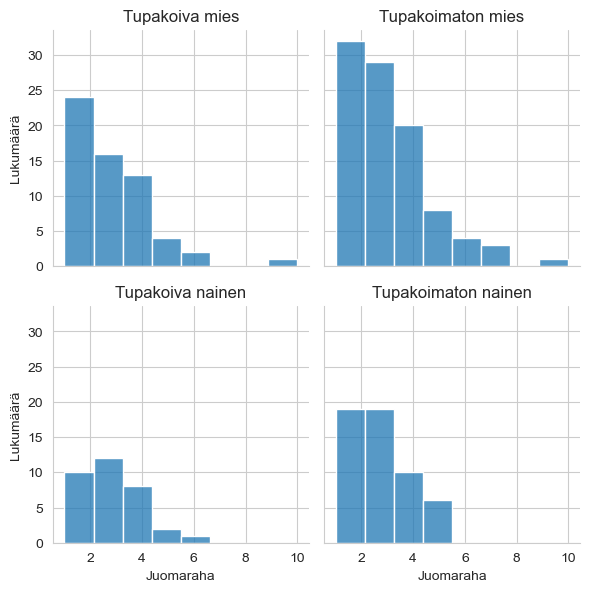

In [8]:
g = sns.displot(tips, x='tip', row='sex', col='smoker', kind='hist', bins=8, height=3)
g.set_axis_labels('Juomaraha', 'Lukumäärä')

g.axes[0, 0].set_title('Tupakoiva mies')
g.axes[0, 1].set_title('Tupakoimaton mies')
g.axes[1, 0].set_title('Tupakoiva nainen')
g.axes[1, 1].set_title('Tupakoimaton nainen')

### Muuta huomioitavaa

#### Fontit

Tekstiä lisäävät funktiot (**plt.title**, **plt.xlabel**, **plt.xticks** jne.) tunnistavat tekstiin liittyviä parametreja https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text kuten esimerkiksi **fontsize** ja **fontstyle**.

Jos haluat tehdä kerralla koko muistiota koskevia fonttimuutoksia, niin katso [matplotlib7.ipynb](https://github.com/taanila/kaaviot/blob/master/matplotlib7.ipynb).

#### Värit

Kaavion väripaletin voit vaihtaa antamalla kaavionluonti-komennossa arvo **palette**-parametrille. Esimerkiksi `palette='Set1'` muuttaa paletiksi **Set1** tai `palette=['green', 'red']` muuntaa kahdenvärisiä pylväitä sisältävän kaavion pylväät vihreiksi ja punaisiksi.

Jos haluat käyttää kaikissa muistion kaavioissa samaa vaihtoehtoista palettia, niin käytä **sns.set_palette**-funktiota, esimerkiksi `sns.set_palette('Set1')`.

- Värejä https://matplotlib.org/stable/gallery/color/named_colors.html.
- Paletteja https://matplotlib.org/stable/gallery/color/colormap_reference.html.

#### Kuvion koko

Kuvion (**Figure**) oletuskoko on **6.4 x 4.8**. Jos haluat vaihtaa koon, niin luo kuvio ennen kaavion luontia, esimerkiksi `plt.figure(figsize=(4, 3))`. Usean kaavion yhdistelmän koon voit vaihtaa **subplots** funktion **figsize**-parametrilla. Funktiolla **displot** luotavan kaavion kokoa voit säätää **height**-parametrilla.

### Lisätietoa

https://tilastoapu.wordpress.com/python